In [ ]:
!pip install kaggle

##### Dataset: 
US accidents Dataset with 3.5 million records and 49 columns including weather conditions, Turning loop, wind speed etc collected from Kaggle is used in this project. It covers countrywide car accidents which includes 49 states of the USA. The accident data are collected from February 2016 to June 2020. 

There are Traffic Attributes, Weather Attributes, address attributes and the POI attributes.

Dataset Link: https://www.kaggle.com/sobhanmoosavi/us-accidents

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!mkdir .kaggle
!touch .kaggle/kaggle.json

api_token = {"username":"USERNAME","key":"API_KEY"}

import json
import zipfile
import os
with open('/home/jupyterlab/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /home/jupyterlab/.kaggle/kaggle.json

mkdir: cannot create directory ‘.kaggle’: File exists


In [10]:
!kaggle datasets download -d sobhanmoosavi/us-accidents/US_Accidents_June20.csv

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
from zipfile import ZipFile

In [12]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('us-accidents.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [3]:
df = pd.read_csv('US_Accidents_June20.csv')
df.head(4)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day


Let us know the unique values of severity

In [4]:
df.Severity.unique()

array([3, 2, 1, 4])

Now let us draw the barplot of the states and the accidents happen in each states.

<AxesSubplot:>

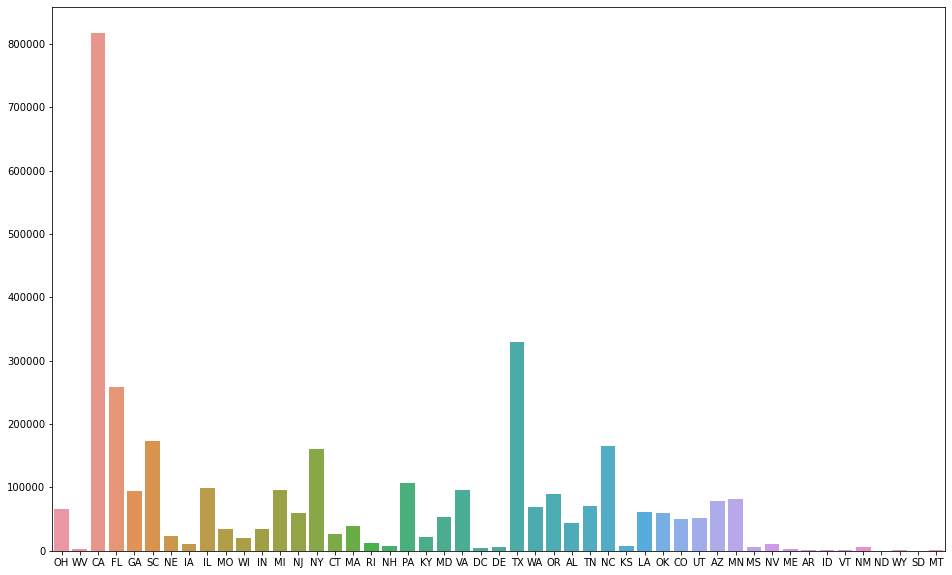

In [11]:
states = df.State.unique()
state_counts=[]
for i in df.State.unique():
    state_counts.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,state_counts)

Now identifying the sources of this dataset and the values from the each source. Here we should see MapQuest, MapQuest-Bing and Bing sources providing the collisions.

In [18]:
df.Source.unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

In [20]:
df['Source'].value_counts()

MapQuest         2414301
Bing             1034799
MapQuest-Bing      64517
Name: Source, dtype: int64

In [ ]:
##https://jupyterlab-6.labs.cognitiveclass.ai/user/sivasaba/files/jupyterlab/us-accidents.zip?_xsrf=2%7C1770171e%7C34250edd3acef4399bc2c5b956db9898%7C1598723434